## 自己符号化器（Auntoencoder）

ここでは、Kerasを用いて、自己符号化器の学習を行う。  
[参考]  
https://blog.keras.io/building-autoencoders-in-keras.html

In [1]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd

2022-09-27 23:42:29.225283: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-27 23:42:29.425351: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-27 23:42:29.425409: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-09-27 23:42:29.521863: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-09-27 23:42:30.492229: W tensorflow/stream_executor/platform/de

### MNISTデータの読み込み

In [2]:
# Load the MNIST dataset
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(X_train, y_train),(X_test, y_test) = mnist.load_data()

# 28*28の画像データを784のベクトルに変換する
X_train = X_train.reshape(-1, 784) / 255
X_test = X_test.reshape(-1, 784) / 255

### モデルの定義
モデルは入力層-中間層-出力層の構成とする。  
入力層-中間層がエンコーダ、中間層-出力層がデコーダになる。  
なお、ここでは、ノードの集まり層と呼んでいる。  

In [3]:
# 中間層のノード数
encoding_dim = 36

# 入力層の定義
input_img = Input(shape=(784,)) 

# 入力層〜中間層を定義
encoded = Dense(encoding_dim, activation='relu')(input_img)

# 中間層〜出力層を定義
decoded = Dense(784, activation='sigmoid')(encoded)
# decoded = Dense(784, activation='linear')(encoded)
 
# 入力層〜中間層までをつなげて、ネットワークを完成させる
autoencoder = Model(inputs=input_img, outputs=decoded)

# 損失関数と最適化手法の定義
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
# autoencoder.compile(optimizer='adam', loss="mean_squared_error") 


# 計算結果を利用しやすくするために、以下のモデルを定義

# エンコーダ部分だけのモデルを定義
encoder = Model(inputs=input_img, outputs=encoded)

# デコーダ部分だけのモデルを定義
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1] # 中間層〜出力層
decoder = Model(inputs=encoded_input, outputs=decoder_layer(encoded_input))

2022-09-27 23:43:29.849045: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-09-27 23:43:29.849973: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-27 23:43:29.850790: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (55c2e234c126): /proc/driver/nvidia/version does not exist
2022-09-27 23:43:29.852182: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### 自己符号化器の訓練
自己符号化器を訓練する。入力データと正解データに同じデータを用いる。

Epoch 1/20
235/235 [==============================] - 3s 11ms/step - loss: 0.2699 - val_loss: 0.1835
Epoch 2/20
235/235 [==============================] - 2s 11ms/step - loss: 0.1659 - val_loss: 0.1490
Epoch 3/20
235/235 [==============================] - 2s 10ms/step - loss: 0.1397 - val_loss: 0.1288
Epoch 4/20
235/235 [==============================] - 2s 10ms/step - loss: 0.1231 - val_loss: 0.1155
Epoch 5/20
235/235 [==============================] - 2s 10ms/step - loss: 0.1126 - val_loss: 0.1075
Epoch 6/20
235/235 [==============================] - 2s 10ms/step - loss: 0.1055 - val_loss: 0.1013
Epoch 7/20
235/235 [==============================] - 2s 10ms/step - loss: 0.1004 - val_loss: 0.0971
Epoch 8/20
235/235 [==============================] - 2s 10ms/step - loss: 0.0968 - val_loss: 0.0942
Epoch 9/20
235/235 [==============================] - 3s 13ms/step - loss: 0.0943 - val_loss: 0.0921
Epoch 10/20
235/235 [==============================] - 3s 13ms/step - loss: 0.0926 - val_lo

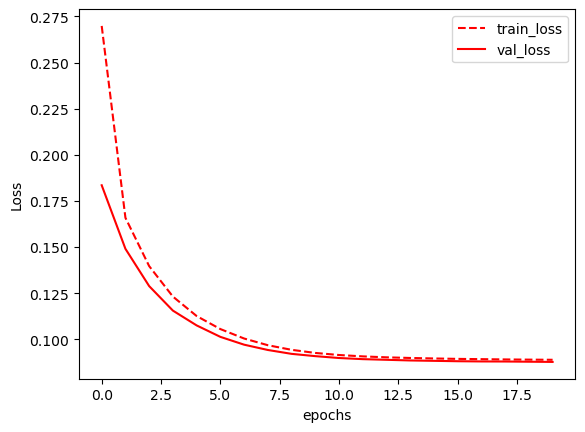

In [4]:
history = autoencoder.fit(X_train, X_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

# 計算過程の描画
df_log = pd.DataFrame(history.history)
df_log.rename(columns={"loss":"train_loss"}, inplace=True)
df_log.plot(style=['r--', 'r-'])
plt.ylabel("Loss")
plt.xlabel("epochs")
plt.show()

### テストデータを入力し、中間層と出力層の値を得る
encoderとdecoderはautoencoderと連動しているので、中間層と出力層の値を個別に得ることができる。

In [ ]:
encoded_imgs = encoder.predict(X_test)
decoded_imgs = decoder.predict(encoded_imgs)
# decoded_imgs = autoencoder.predict(X_test) #としても同じ

### 結果の可視化
matplotlibを使って結果を可視化する。

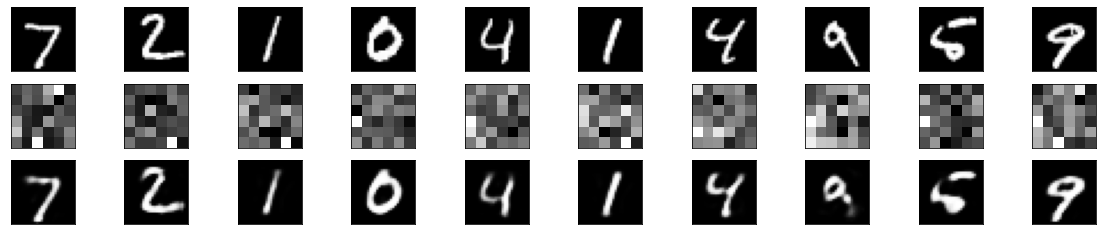

In [ ]:
# 表示させる画像の枚数
n = 10  

plt.figure(figsize=(20, 4))
for i in range(n):
    # 元画像
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 中間層の出力値
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(6,6)) #画像サイズは、encoding_dimに合わせて変更する
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # 出力層の出力値(復元画像)
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### [演習]
* Epoch数を減らすと再構成画像がどうなるか確認してみましょう。
* 中間層のノード数を減らすと再構成画像がどうなるか確認してみましょう。
* 通し課題における自己符号化器の活用方法を考えてみましょう。